In [23]:
import numpy as np
from numpy import linalg as LA
import operator

def msc( W , K, tol, max_it):
    flag=0
    N=len(W)
    Z=np.zeros((N,K))
    X=np.zeros((N,K))
    D=np.diag(np.matmul(W,np.ones(N)))
    D_inverz= LA.inv(D)
    P=np.matmul(D_inverz,W)
    [s,V]=LA.eig(P)
    S=np.diag(s)
    for i in range(K):
        z = max(s)
        for j in range(N):
            if s[j]==z:
                ind = j
                s[j]=-1
                break
        Z[:,i]=V[:,ind]
    for i in range(N):
        X[i,:]=(1/np.sqrt(np.dot(Z[i,:],Z[i,:])))*Z[i,:]
    R=np.zeros((K,K))
    i=np.random.randint(N,size=1)
    R[:,0]=X[i,:]
    c=np.zeros((N,1))
    for k in range(1,K):
        for j in range(N):
            c[j]=c[j]+np.abs(np.matmul(X,R[:,k-1])[j])
        cm=c.min()
        for j in range(N):
            if cm == c[j]:
                ind = j
        R[:,k]=X[ind,:]
    fi=0
    br=0
    rez=np.zeros((max_it+1,1))
    while(br<max_it):
        br=br+1
        Xc=np.matmul(X,R)
        Xd=np.zeros((N,K))
        for i in range(N):
            l = max(Xc[i,:])
            for j in range(K):
                if l == Xc[i][j]:
                    ind = j
                    break
            Xd[i,j]=1
        [U,O,V]=LA.svd(np.matmul((np.transpose(Xd)),X))
        fi_n = np.sum(O)
        rez[br]=abs(fi-fi_n)
        if rez[br] < tol:
            return [ Xd, rez, flag]
        fi=fi_n
        R=np.transpose(np.matmul(U,V))
        X=Xc
    if rez[br]>tol:
        flag=1    
    return [ Xd, rez, flag]

In [24]:
import math
def gaussian(n, X):
    W = np.zeros((n, n), dtype=np.float64)
    for i in range(0, n):
        for j in range(0, n):
            W[i, j] = np.linalg.norm(X[i]-X[j]) / 50
            W[i, j] = math.exp(-W[i, j]) 
    return W

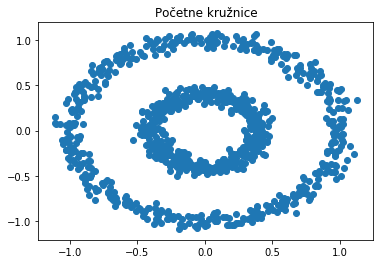

In [25]:
#primjer 1. s krugovima 
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
from itertools import cycle, islice

n_samples=1000
X, clusters = datasets.make_circles(n_samples=1000, noise=.05, factor=.4, random_state=0)
plt.title('Početne kružnice')
plt.scatter(X[:,0], X[:,1])
plt.savefig('krugovi_pocetno.png')

In [26]:
from sklearn.metrics import pairwise_distances
W = pairwise_distances(X, metric="euclidean")
vectorizer = np.vectorize(lambda x: 1 if x < 0.3 else 0)
W = np.vectorize(vectorizer)(W)
out = msc( W , 2, 0.001, 10)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part


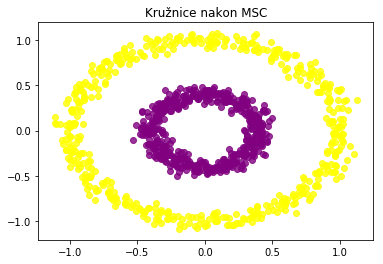

In [27]:
list1=[]
list2=[]
for i in range(n_samples):
    if(out[0][:,1][i]==1):
        list1.append(X[i,0])
        list2.append(X[i,1])        
plt.scatter(list1, list2, color='yellow', alpha=0.8)
list1=[]
list2=[]
for i in range(n_samples):
    if(out[0][:,1][i]==0):
        list1.append(X[i,0])
        list2.append(X[i,1])  
plt.title('Kružnice nakon MSC')
plt.scatter(list1, list2, color='purple', alpha=0.8)
plt.savefig('krugovi_MSC.png')

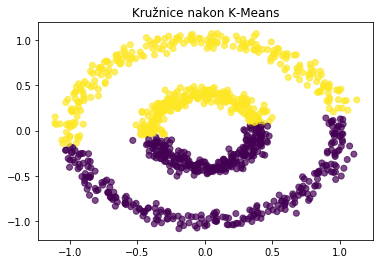

In [28]:
#isti primjer s k-means algoritmom implementiranim u sklearn biblioteci
from sklearn.cluster import KMeans

km = KMeans(init='k-means++', n_clusters=2)
km_clustering = km.fit(X)
plt.title('Kružnice nakon K-Means')
plt.scatter(X[:,0], X[:,1], c=km_clustering.labels_, cmap='viridis', alpha=0.7)
plt.savefig('krugovi_kmeans.png')

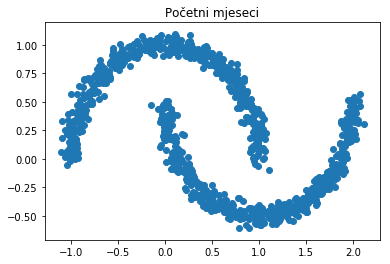

In [29]:
#primjer 2. s mjesecima
X, clusters = datasets.make_moons(n_samples=n_samples, noise=.05)
plt.title('Početni mjeseci')
plt.scatter(X[:,0], X[:,1])
#plt.savefig('mjeseci_pocetno')

In [30]:
W = pairwise_distances(X, metric="euclidean")
vectorizer = np.vectorize(lambda x: 1 if x < 0.15 else 0)
W = np.vectorize(vectorizer)(W)
out = msc( W , 2, 0.001, 10)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part


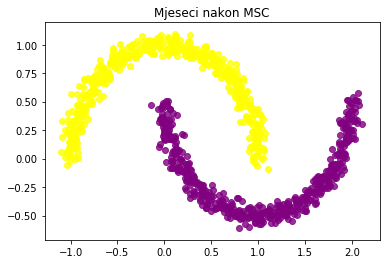

In [31]:
list1=[]
list2=[]
for i in range(n_samples):
    if(out[0][:,1][i]==1):
        list1.append(X[i,0])
        list2.append(X[i,1])        
plt.scatter(list1, list2, color='yellow', alpha=0.8)
list1=[]
list2=[]
for i in range(n_samples):
    if(out[0][:,1][i]==0):
        list1.append(X[i,0])
        list2.append(X[i,1])     
plt.title('Mjeseci nakon MSC')
plt.scatter(list1, list2, color='purple', alpha=0.8)
#plt.savefig('mjeseci_MSC.png')

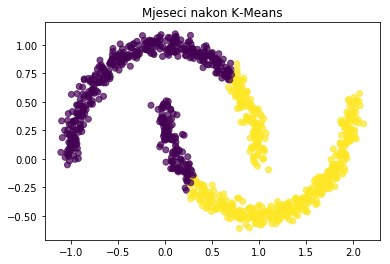

In [32]:
km = KMeans(init='k-means++', n_clusters=2)
km_clustering = km.fit(X)
plt.title('Mjeseci nakon K-Means')
plt.scatter(X[:,0], X[:,1], c=km_clustering.labels_, cmap='viridis', alpha=0.7)
#plt.savefig('mjeseci_kmeans.png')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if sys.path[0] == '':
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'contours'
  s)


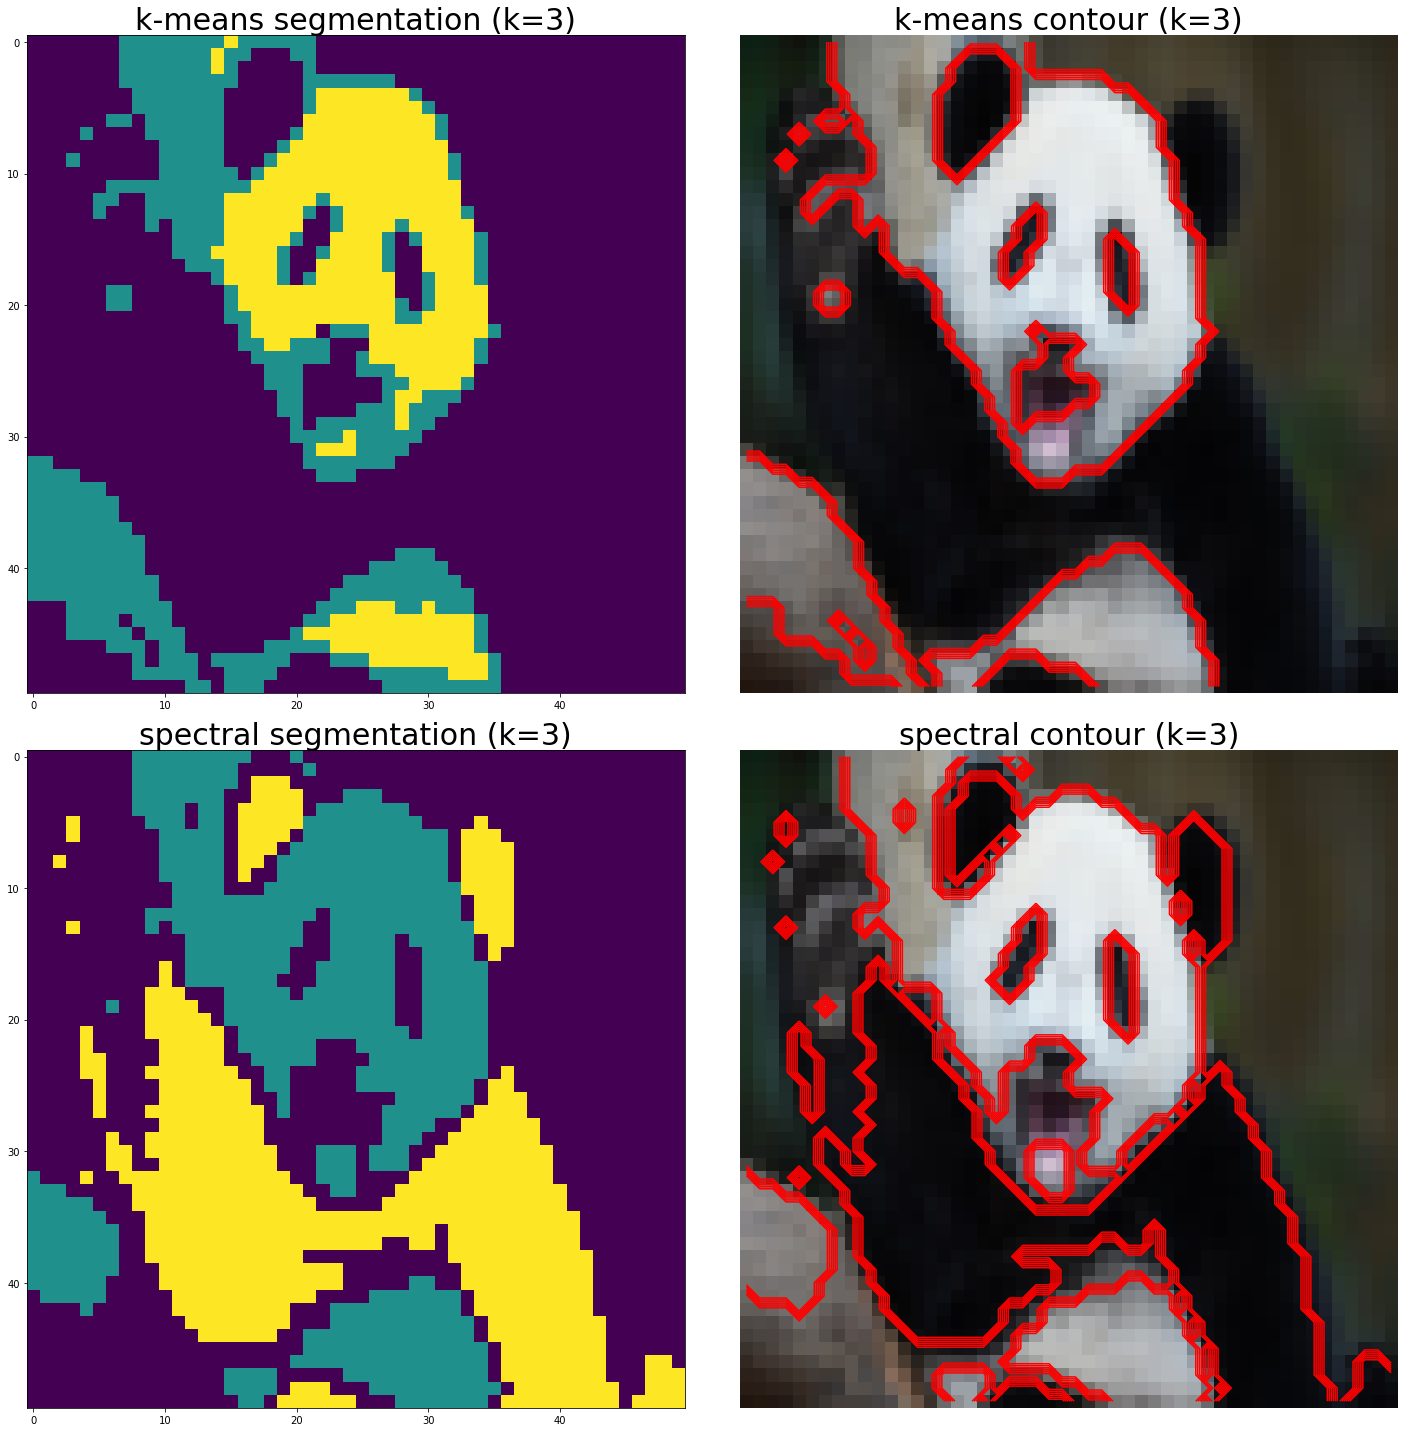

In [34]:
#primjer sa slikom s interneta- https://learning.oreilly.com/library/view/hands-on-image-processing/9781789343731/a7dc651e-ad0f-4a71-9801-5b053fba3947.xhtml
from sklearn import cluster
from skimage.io import imread
from scipy.misc import imresize
import matplotlib.pylab as pylab
from PIL import Image
import requests
from io import BytesIO

response = requests.get('https://media4.s-nbcnews.com/j/newscms/2016_36/1685951/ss-160826-twip-05_8cf6d4cb83758449fd400c7c3d71aa1f.fit-760w.jpg')
img = Image.open(BytesIO(response.content))
im = imresize(img, (50,50,3))

k = 3
X = np.reshape(im, (-1, im.shape[-1]))
two_means = cluster.MiniBatchKMeans(n_clusters=k, random_state=10)
two_means.fit(X)
y_pred = two_means.predict(X)
labels = np.reshape(y_pred, im.shape[:2])
pylab.figure(figsize=(20,20))
pylab.subplot(221), pylab.imshow(np.reshape(y_pred, im.shape[:2])), pylab.title('k-means segmentation (k=3)', size=30)
pylab.subplot(222), pylab.imshow(im), pylab.contour(labels == 0, contours=1, colors='red'), pylab.axis('off')
pylab.title('k-means contour (k=3)', size=30)
spectral = cluster.SpectralClustering(n_clusters=k, eigen_solver='arpack', affinity="nearest_neighbors", n_neighbors=100, random_state=10)
spectral.fit(X) 
y_pred = spectral.labels_.astype(np.int)
labels = np.reshape(y_pred, im.shape[:2])
pylab.subplot(223), pylab.imshow(np.reshape(y_pred, im.shape[:2])), pylab.title('spectral segmentation (k=3)', size=30)
pylab.subplot(224), pylab.imshow(im), pylab.contour(labels == 0, contours=1, colors='red'), pylab.axis('off'), pylab.title('spectral contour (k=3)', size=30), pylab.tight_layout()
pylab.savefig('panda_sklearn_1')
pylab.show()

In [42]:
from sklearn.metrics import pairwise_distances
import math
W = pairwise_distances(X, metric="euclidean")
vectorizer = np.vectorize(lambda x: 1 if x < 20 else 0)
W = np.vectorize(vectorizer)(W)
#n=2500
#A = np.zeros((n, n), dtype=np.float64)
#for i in range(0, n):
#    for j in range(0, n):
#        A[i, j] = np.linalg.norm(X[i]-X[j]) / 50
#        A[i, j] = math.exp(-A[i, j])
#W = gaussian(2500, X)
out = msc( W , 4, 0.1, 10)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part


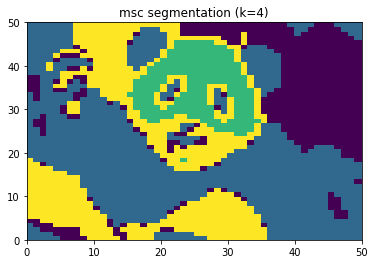

In [44]:
col1=1*np.flip(np.reshape(out[0][:,0],(50,50)),0)
col2=2*np.flip(np.reshape(out[0][:,1],(50,50)),0)
col3=3*np.flip(np.reshape(out[0][:,2],(50,50)),0)
col4=4*np.flip(np.reshape(out[0][:,3],(50,50)),0)
colall=col1+col2+col3+col4
plt.pcolormesh(colall)
plt.title('msc segmentation (k=4)')
plt.savefig('panda_msc.png')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


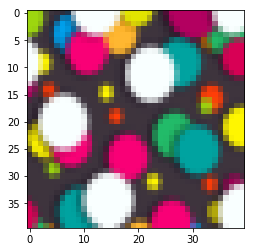

In [45]:
#primjer 2. sa slikom - krugovi
img  = Image.open("grafovi_slike/slika_krugovi.jpg")  
im = imresize(img, (40,40,3))
pylab.imshow(im)
#pylab.imsave('krugovi_slika.png', im)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part


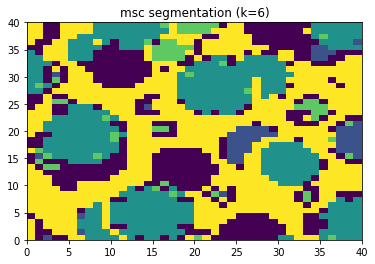

In [46]:
X = np.reshape(im, (-1, im.shape[-1]))
W = pairwise_distances(X, metric="euclidean")
vectorizer = np.vectorize(lambda x: 1 if x < 261 else 0)
W = np.vectorize(vectorizer)(W)
#W = gaussian(1600, X)
out = msc( W , 6, 1, 10)

col1=1*np.flip(np.reshape(out[0][:,0],(40,40)),0)
col2=2*np.flip(np.reshape(out[0][:,1],(40,40)),0)
col3=3*np.flip(np.reshape(out[0][:,2],(40,40)),0)
col4=4*np.flip(np.reshape(out[0][:,3],(40,40)),0)
col5=5*np.flip(np.reshape(out[0][:,4],(40,40)),0)
col6=6*np.flip(np.reshape(out[0][:,5],(40,40)),0)
colall=col1+col2+col3+col4+col5+col6
plt.pcolormesh(colall)
plt.title('msc segmentation (k=6)')
plt.savefig('slika_krugovi_msc.png')

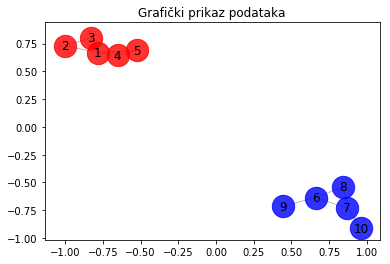

In [47]:
#primjer 1. s grafom - nacrtamo graf pomoću networkx te primijenimo na njega msc
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_edges_from([
    [1, 2],
    [1, 3],
    [1, 4],
    [2, 3],
    [3, 4],
    [4, 5],
    [1, 5],
    [6, 7],
    [7, 8],
    [6, 8],
    [6, 9],
    [9, 6],
    [7, 10]
])
#W = nx.adjacency_matrix(G)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,
                       nodelist=[1,2,3,4,5],
                       node_color='r',
                       node_size=500, alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=[6,7,8,9,10],
                       node_color='b',
                       node_size=500, alpha=0.8)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)
plt.title('Grafički prikaz podataka')
plt.show()
#plt.savefig('generirani_graf.png')
#print(W.todense())

In [49]:
W = np.array([
    [0, 1, 1, 1, 1, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 1, 0, 0, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 1], [0, 0, 0, 0, 0, 1, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])
msc(W, 2, 0.1, 10)

[array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]]), array([[ 0.        ],
        [10.        ],
        [ 2.92893219],
        [ 2.92893219],
        [ 2.92893219],
        [ 2.92893219],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]]), 0]

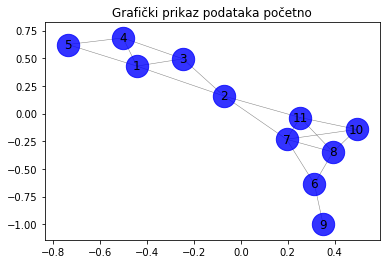

In [50]:
#primjer 2. s grafom 
G = nx.Graph()
G.add_edges_from([
    [1, 2],
    [1, 3],
    [1, 4],
    [2, 3],
    [3, 4],
    [4, 5],
    [1, 5],
    [6, 7],
    [7, 8],
    [6, 8],
    [6, 9],
    [9, 6],
    [7, 10],
    [7, 2],
    [11, 2],
    [11, 7],
    [8, 11],
    [8, 10],
    [11, 10]
])
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,
                       nodelist=[1,2,3,4,5,6,7,8,9,10,11],
                       node_color='b',
                       node_size=500, alpha=0.8)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)
plt.title('Grafički prikaz podataka početno')
#plt.savefig('generirani_graf_2_pocetno.png')
plt.show()
#W = nx.adjacency_matrix(G)
#print(W.todense())

In [55]:
W = np.array([
    [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1], [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
    [0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1], [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0] ])
out = msc(W, 3, 0.1, 10)
out

[array([[0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.]]), array([[0.00000000e+00],
        [1.04621429e+01],
        [2.94030776e-01],
        [6.93006136e-01],
        [6.93006136e-01],
        [2.26805504e-01],
        [6.79577521e-01],
        [3.55271368e-15],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]]), 0]

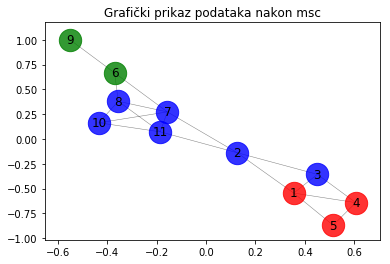

In [56]:
list1 = []
list2 = []
list3 = []
for i in range(11):
    if(out[0][i][0]==1): list1.append(i+1)
    if(out[0][i][1]==1): list2.append(i+1) 
    if(out[0][i][2]==1): list3.append(i+1) 
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,
                       nodelist=list1,
                       node_color='b',
                       node_size=500, alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=list2,
                       node_color='r',
                       node_size=500, alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=list3,
                       node_color='g',
                       node_size=500, alpha=0.8)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)
plt.title('Grafički prikaz podataka nakon msc')
#plt.savefig('generirani_graf_2_msc.png')
plt.show()